In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

## Set up the Maze environment

In [2]:
class maze():
    '''
    class to define a maze of arbitrary size, with hurdles in between 
    '''
    
    def __init__(self, size = 4):
        self.size=size
        self.board = np.zeros((size, size))
        
        mvlist = []
        for i in range(size):
            for j in range(size):
                mvlist.append((i,j))
        self.movelist = mvlist
        self.allmoves = self.movelist
        
        self.start = (0,0)
        self.end = (size-1, size-1)
        #print (self.end)
        self.agent_pos = self.start
        self.actions = ['N', 'E', 'S', 'W']
    
    def set_blocks(self, blocklist):
        '''
        function to define hurdles/closed cells
        '''
        mlist = self.movelist
        nlist = []
        
        for mm in mlist:
            if (mm in blocklist):
                pass
            else:
                nlist.append(mm)
                
        self.movelist = nlist     
            
    def move(self, step):
        '''
        function to move the agent by the given step. if a step takes the agent out of the maze, 
        that step is not executed
        '''
        orow,ocol = self.agent_pos
        
        row,col = self.agent_pos
        
        #print (row, col)
        if (step == 'N'):
            row -= 1
        elif (step =='E'):
            col += 1
        elif (step == 'S'):
            row += 1
        elif (step == 'W'):
            col -= 1
            
        #print (row, col)
        
        reward = -0.1        
        if ((row,col) in self.movelist):
            reward = -(abs(row-self.end[0]) + abs(col-self.end[1]))
        else:
            reward = -100
            row, col = orow, ocol
            
        # update agent position
        self.agent_pos = (row,col)
        
        return (reward)       
    
    def print_board(self, fname='Test.png', count=0, move=0,reward=0):
        '''
        function to print board, to visualise agent movement
        '''
        agent_position = self.agent_pos
        fields = list(self.allmoves)
        movelist = list(self.movelist)
        #blockedmoves = list(self.blocklist)
        size = self.size
        nfields = len(fields)
        board = "-----------------\n"

        for i in range(0, nfields, size):
            line = fields[i:i+size]
            for field in line:
                if field == agent_position:
                    board += "| A "
                elif field == fields[0]:
                    board += "| S "
                elif field == fields[-1]:
                    board += "| E "
                elif field not in movelist:
                    board += "| X "
                else:
                    board += "|   "
            board += "|\n"
            board += "-----------------\n"     
        #print(board)
        #plt.rc('figure', figsize=(12, 7))
        stepstr = 'step:' + str(count)
        movestr = 'move:' + str(move)
        rewardstr = 'reward:' + str(reward)
        #plt.clf()
        plt.close('all')
        plt.rc('figure', figsize=(4,4))
        plt.text(0.15, 0.9, str(stepstr), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
        plt.text(0.45, 0.9, str(movestr), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
        plt.text(0.25, 0.8, str(rewardstr), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
        plt.text(0.1, 0.1, str(board), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(fname)
        return ()
    
    ##############################################################################################################
    ## functions for reinforcement learning
    def state(self):
        '''
        function to return agent position, for use in the Q learning table
        '''
        return (self.agent_pos)
    
    def setpos(self, pos):
        '''
        function to set the starting position of agent at different locations
        '''
        self.agent_pos = pos

### Debug the environment

Agent position is at (0, 0)
move list is [(0, 0), (0, 1), (0, 2), (1, 0), (1, 2), (1, 3), (2, 0), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]
Yes
(0, 0)


()

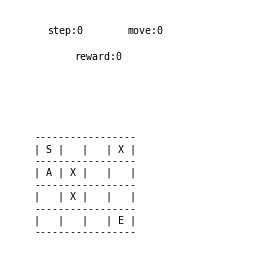

In [3]:
Board = maze()
print ('Agent position is at', Board.agent_pos)

Board.set_blocks([(1,1), (2,1), (0,3)])
print ("move list is", Board.movelist)

if (0,1) in Board.movelist:
    print ('Yes')
    
print (Board.agent_pos) 
Board.move('S')

Board.print_board()

In [4]:
######################################################################
######### Functions used
######################################################################

## Reinforcement learning functions

(0, 0)
['N', 'E', 'S', 'W']


()

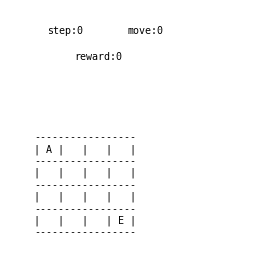

In [5]:
Board = maze(size=4)
print (Board.agent_pos)
#print (Board.board)
print (Board.actions)
Board.print_board()

In [6]:
size=Board.size
actions = Board.actions
nactions = len(actions)
print (size, nactions)
print (actions)
alpha = 0.5
gamma = 0.1
epsilon = 1.0

##################################################################################
## Declare the q table as an array of size (n X n) where n is the size of the maze
## State is the location of agent (i,j) in the Qtable
## actions are 4 movements, N, E, W, and S

def initQtable():
    Q = np.zeros((size, size, nactions))
    for i in range(size):
        for j in range(size):
            for k in range(nactions):
                Q[i,j,k] = 0.001 * np.random.random()
    print ('Shape of Q table is', np.shape(Q))
    return (Q)
    
def retbestact(Qtable, state):
    '''
    Qtable: as declared above, is a np array
    state: comes from enviornment is a tuple with three values
    '''
    #print (state)
    maxval = np.max(Qtable[state])
    argmax = np.argmax(Qtable[state])
    
    return (maxval, argmax)

##################################################################################
## Function to return action - based on greedy epsilon
def chooseaction(Qtable, state):
    #print ('Hello')

    maxval, argmax = retbestact(Qtable, state)
    #bestact = actions[argmax]
    
    ### If random number greater than epsion, choose exploitaiton
    ### else, choose exploration
    if (np.random.random() > epsilon):
        bestact = actions[argmax]
        flag = 'best'
    else:
        bestact = np.random.choice(actions)
        flag = 'random' 
    return (bestact)

### Test the RL functions
Q = initQtable()

## Test the return best action function
#Q[2,1,3] = 5
#Q[2,1,0] = 15

retbestact(Q, (2,1))

## Test the choose action function
chooseaction(Q, (2,1))

4 4
['N', 'E', 'S', 'W']
Shape of Q table is (4, 4, 4)


'S'

In [7]:
Q

array([[[4.99731038e-04, 9.95375265e-04, 1.40805811e-05, 9.44221545e-04],
        [9.27776662e-04, 3.98468621e-04, 1.91956046e-04, 4.99118740e-04],
        [3.72030319e-04, 1.39185439e-04, 8.40887041e-05, 2.69026607e-04],
        [1.14154133e-04, 5.25268587e-05, 8.30024865e-04, 4.92743060e-04]],

       [[2.59538608e-04, 1.22424412e-04, 7.22465618e-04, 6.12782584e-04],
        [8.55375725e-04, 7.99408465e-04, 7.84366171e-04, 8.86015747e-04],
        [1.86587890e-04, 9.66419890e-04, 1.34211208e-05, 8.06925681e-04],
        [6.96435492e-04, 3.24948398e-04, 4.86916982e-04, 2.42898285e-04]],

       [[1.14930923e-04, 9.68044259e-04, 2.78666250e-04, 8.82915635e-05],
        [1.33752258e-04, 9.70679888e-04, 9.12224893e-04, 5.89422243e-04],
        [1.41574939e-04, 5.05810704e-04, 5.83274423e-04, 6.86083559e-04],
        [2.12146641e-04, 3.88030906e-04, 3.78113644e-04, 8.44392305e-04]],

       [[9.07851531e-04, 1.18348668e-04, 8.32411767e-04, 6.98467910e-04],
        [8.90086906e-04, 8.12174

## Training the agent

## Exploration

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]
1
Shape of Q table is (4, 4, 4)
()
total steps 10000


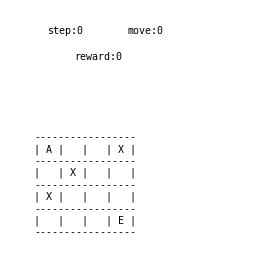

In [8]:
## Initialize the board
Board = maze(size=4)
Board.set_blocks([(1,1), (2,0), (0,3)])
print (Board.movelist)

## set up highest epsilon, for exploration
epsilon=1
print (epsilon)

## count steps in each direction
movecounter = {'N':0, 'E':0, 'S':0, 'W':0}
## count number of steps
count = 0

# Q table
Q = initQtable()

a = list(Board.movelist)
print (Board.print_board())

#location
currstate = Board.state()
#print (currstate)

for i in range(10000):
    
    # choose a step to move
    mve = chooseaction(Q, currstate)
    movecounter[mve] += 1
    # get the reward for the move and make the move
    reward = Board.move(mve)

    newstate = Board.state()
    #print (newstate)

    maxval, argmax = retbestact(Q, newstate)

    #  use arg max
    #nextmaxre  = argmax

    # use max val
    nextmaxre  = maxval
    
    #print ('nextmaxreward', nextmaxre)

    loc = (currstate[0], currstate[1], actions.index(mve))

    Q[loc] += alpha * (reward + gamma * nextmaxre - Q[loc])
    
    currstate = newstate

    count += 1
print ('total steps', count)

In [9]:
movecounter

{'N': 2479, 'E': 2475, 'S': 2527, 'W': 2519}

In [10]:
print (Q)

[[[-1.00543210e+02 -5.43210101e+00 -5.65432101e+00 -1.00543210e+02]
  [-1.00432101e+02 -4.32101010e+00 -1.00432101e+02 -6.54321010e+00]
  [-1.00321010e+02 -1.00321010e+02 -3.21010101e+00 -5.43210101e+00]
  [ 7.70287401e-04  8.89361804e-04  4.94682281e-04  3.87229217e-04]]

 [[-6.54321010e+00 -1.00654321e+02 -1.00654321e+02 -1.00654321e+02]
  [ 3.54070908e-05  8.04554889e-04  7.08006801e-04  6.75284604e-04]
  [-4.32101010e+00 -2.10101010e+00 -2.10101010e+00 -1.00210101e+02]
  [-1.00101010e+02 -1.00101010e+02 -1.01010101e+00 -3.21010101e+00]]

 [[ 1.56906052e-04  7.13176028e-04  3.27952427e-04  9.57279378e-04]
  [-1.00210101e+02 -2.10101010e+00 -2.10101010e+00 -1.00210101e+02]
  [-3.21010101e+00 -1.01010101e+00 -1.01010101e+00 -3.21010101e+00]
  [-2.10101010e+00 -1.00010101e+02 -1.01010101e-01 -2.10101010e+00]]

 [[-1.00210101e+02 -2.10101010e+00 -1.00210101e+02 -1.00210101e+02]
  [-3.21010101e+00 -1.01010101e+00 -1.00101010e+02 -3.21010101e+00]
  [-2.10101010e+00 -1.01010101e-01 -1.0001

## Checking the trained agent movement - Exploitation

Step-00.jpg
(0, 0) E
Step-01.jpg
(0, 1) E
Step-02.jpg
(0, 2) S
Step-03.jpg
(1, 2) E
Step-04.jpg
(1, 3) S
Step-05.jpg
(2, 3) S
Step-06.jpg


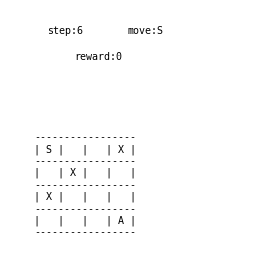

In [12]:
Board = maze(size=4)
Board.set_blocks([(1,1), (2,0), (0,3)])
epsilon = 0
ll = []

fname='Step-00.jpg'
print (fname)
Board.print_board(fname = fname, count = 0, move = '')
    
for i in range(10):
    currstate = Board.state()
    if (currstate == (3,3)):
        break
    mve = chooseaction(Q, currstate)
    Board.move(mve)
    print (currstate, mve)
    fname='Step-' + str(i+1).zfill(2) + '.jpg'
    print (fname)
    Board.print_board(fname = fname, count = i+1, move = mve)